In [1]:
from read_graph import read_ID_map, read_link_graph
from helpers import build_transpose_graph

TITLES_TO_IDS, IDS_TO_TILES = read_ID_map("data/ID_map.txt")
GRAPH = read_link_graph("data/link_graph_ids.txt")
TRANSPOSE_GRAPH = build_transpose_graph(GRAPH)

Building Transpose Graph: 100%|██████████| 16714619/16714619 [01:10<00:00, 235466.68it/s]


In [15]:
import importlib

import search
importlib.reload(search)

search.GRAPH = GRAPH
search.TRANSPOSE_GRAPH = TRANSPOSE_GRAPH
search.TITLES_TO_IDS = TITLES_TO_IDS
search.IDS_TO_TILES = IDS_TO_TILES

In [16]:
landmarks = [
    TITLES_TO_IDS["United_States"],
    # TITLES_TO_IDS["John_Cena"],
]
search.compute_landmark_distances(landmarks)

Computing distances to landmark: United_States
depth: 0 (United_States)
depth: 1 (AmericA)
1000000
2000000
3000000
4000000
5000000
depth: 2 (August_22)
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
depth: 3 (Aug_22)
14000000
15000000
depth: 4 (8/9_(disambiguation))
depth: 5 (John_Smiley_(disambiguation))
depth: 6 (5-hydroxy-2-(4-hydroxyphenyl)-3,7-dimethoxychromen-4-one)
depth: 7 (List_of_highways_numbered_964)
depth: 8 (List_of_highways_numbered_965)
depth: 9 (Highway_965)
depth: 10 (List_of_highways_numbered_1122)
depth: 11 (List_of_highways_numbered_1121)
depth: 12 (List_of_highways_numbered_1120)
depth: 13 (List_of_highways_numbered_1119)
depth: 14 (List_of_highways_numbered_1118)
depth: 15 (List_of_highways_numbered_1117)
depth: 16 (List_of_highways_numbered_1116)
depth: 17 (List_of_highways_numbered_1115)
depth: 18 (List_of_highways_numbered_1114)
depth: 19 (List_of_highways_numbered_1113)
depth: 20 (List_of_highways_numbered_1112)
depth: 21 (List_of_highway

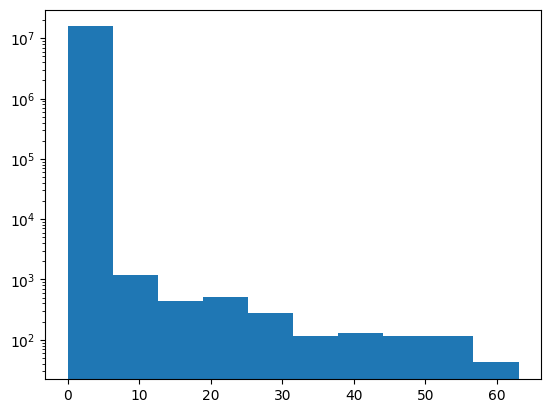

In [14]:
import matplotlib.pyplot as plt

plt.hist(search.LANDMARK_DISTANCES[landmarks[0]].values())
plt.gca().set_yscale("log")

In [10]:
search.landmarks_heuristic(
    TITLES_TO_IDS["Babe_Ruth"],
    TITLES_TO_IDS["Coastal_California"],
    TITLES_TO_IDS["Baseball"]
)

0

In [7]:
import timeit

def test(start, goal):
    print("Dummy Heuristic")
    start_time = timeit.default_timer()
    path = search.shortest_path(start, goal, method="A* dummy")
    stop_time = timeit.default_timer()
    print()
    print(f"({(stop_time-start_time)*1000:.0f} ms)")

    print("Path:  ", "  ->  ".join(path))
    print()

    print("Landmarks Heuristic")
    start_time = timeit.default_timer()
    path = search.shortest_path(start, goal, method="A* landmarks")
    stop_time = timeit.default_timer()
    print()
    print(f"({(stop_time-start_time)*1000:.0f} ms)")

    print("Path:  ", "  ->  ".join(path))
    print()

In [8]:
test("Babe_Ruth", "Coastal_California")

Dummy Heuristic

(6069 ms)
Path:   Babe_Ruth  ->  The_New_York_Times  ->  California  ->  Coastal_California

Landmarks Heuristic

(11478 ms)
Path:   Babe_Ruth  ->  The_New_York_Times  ->  California  ->  Coastal_California

